In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from matplotlib.pyplot import figure

import requests
import json
import seaborn as sns
from config import g_key

In [4]:
file = "HH_Provider_July2021.csv"

df = pd.read_csv(file)

In [5]:
df.drop("Footnote for quality of patient care star rating", inplace=True, axis=1)
df.drop("Footnote for how often the home health team began their patients' care in a timely manner", inplace=True, axis=1)
df.drop("Footnote for how often the home health team taught patients (or their family caregivers) about their drugs", inplace=True, axis=1)
df.drop("Footnote for how often the home health team determined whether patients received a flu shot for the current flu season", inplace=True, axis=1)
df.drop("Footnote for how often patients got better at walking or moving around", inplace=True, axis=1)
df.drop("Footnote for how often patients got better at getting in and out of bed", inplace=True, axis=1)
df.drop("Footnote for how often patients got better at bathing", inplace=True, axis=1)
df.drop("Footnote for how often patients got better at taking their drugs correctly by mouth", inplace=True, axis=1)
df.drop("Footnote for how often home health patients had to be admitted to the hospital", inplace=True, axis=1)
df.drop("Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted", inplace=True, axis=1)
df.drop("Footnote Changes in skin integrity post-acute care: pressure ulcer/injury", inplace=True, axis=1)
df.drop("Footnote for how often physician-recommended actions to address medication issues were completely timely", inplace=True, axis=1)
df.drop("Footnote for DTC Risk-Standardized Rate", inplace=True, axis=1)
df.drop("Footnote for PPR Risk-Standardized Rate", inplace=True, axis=1)
df.drop("Footnote for how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally", inplace=True, axis=1)

In [6]:
df.columns

Index(['State', 'CMS Certification Number (CCN)', 'Provider Name', 'Address',
       'City', 'ZIP', 'Phone', 'Type of Ownership',
       'Offers Nursing Care Services', 'Offers Physical Therapy Services',
       'Offers Occupational Therapy Services',
       'Offers Speech Pathology Services', 'Offers Medical Social Services',
       'Offers Home Health Aide Services', 'Date Certified',
       'Quality of patient care star rating',
       'How often the home health team began their patients' care in a timely manner',
       'How often the home health team taught patients (or their family caregivers) about their drugs',
       'How often the home health team determined whether patients received a flu shot for the current flu season',
       'How often patients got better at walking or moving around',
       'How often patients got better at getting in and out of bed',
       'How often patients got better at bathing',
       'How often patients' breathing improved',
       'Footnote for

In [7]:
df=df.replace("Better Than National Rate", "Higher")
df=df.replace("Same As National Rate", "Average")
df=df.replace("Worse Than National Rate", "Lower")

In [8]:
df=df.rename(columns={"How often the home health team began their patients' care in a timely manner": "Timely manner rating",
                     "How often the home health team taught patients (or their family caregivers) about their drugs": "Teaching patients about drugs rating",
                     "How often the home health team determined whether patients received a flu shot for the current flu season": "Flu Shot Confirmation rating",
                     })

In [9]:
df_new=df.copy()

In [10]:
df_new["Type of Ownership"].value_counts()

PROPRIETARY                                     9054
VOLUNTARY NON-PROFIT - PRIVATE                   833
VOLUNTARY NON-PROFIT - OTHER                     584
VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION     304
GOVERNMENT - STATE/COUNTY                        241
GOVERNMENT - LOCAL                               142
GOVERNMENT - COMBINATION GOVT & VOLUNTARY         18
Name: Type of Ownership, dtype: int64

In [11]:
df=df.replace("GOVERNMENT - STATE/COUNTY", "GOVERNMENT - FEDERAL/STATE/COUNTY/DISTRICT")
df=df.replace("VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION", "VOLUNTARY NON PROFIT - RELIGIOUS")
df=df.replace("GOVERNMENT - LOCAL", "GOVERNMENT - FEDERAL/STATE/COUNTY/DISTRICT")
df=df.replace("VOLUNTARY NON-PROFIT - OTHER", "UNCLASSIFIED")
df=df.replace("GOVERNMENT - COMBINATION GOVT & VOLUNTARY", "UNCLASSIFIED")

In [12]:
df["Type of Ownership"].value_counts()

PROPRIETARY                                   9054
VOLUNTARY NON-PROFIT - PRIVATE                 833
UNCLASSIFIED                                   602
GOVERNMENT - FEDERAL/STATE/COUNTY/DISTRICT     383
VOLUNTARY NON PROFIT - RELIGIOUS               304
Name: Type of Ownership, dtype: int64

In [13]:
df_ratings = df[["CMS Certification Number (CCN)", "Provider Name", "Type of Ownership", 
                "Quality of patient care star rating", 
                "Timely manner rating", 
                "Teaching patients about drugs rating", 
                "Flu Shot Confirmation rating",
                "How often patients got better at walking or moving around",
                "How often patients got better at getting in and out of bed", 
                "How often patients got better at bathing", 
                "How often patients' breathing improved", 
                "How often patients got better at taking their drugs correctly by mouth", 
                "How often home health patients had to be admitted to the hospital", 
                "How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",
                "How often physician-recommended actions to address medication issues were completely timely", 
                "DTC Risk-Standardized Rate", "DTC Performance Categorization", "PPR Risk-Standardized Rate", 
                "PPR Performance Categorization"]]
df_ratings.head()

,CMS Certification Number (CCN),Provider Name,Type of Ownership,Quality of patient care star rating,Timely manner rating,Teaching patients about drugs rating,Flu Shot Confirmation rating,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients' breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",How often physician-recommended actions to address medication issues were completely timely,DTC Risk-Standardized Rate,DTC Performance Categorization,PPR Risk-Standardized Rate,PPR Performance Categorization
0,17000,ALABAMA DEPARTMENT OF PUBLIC HEALTH HOME CARE,GOVERNMENT - FEDERAL/STATE/COUNTY/DISTRICT,4.0,93.4,98.8,55.3,86.3,84.6,86.6,81.4,78.9,14.4,15.8,91.6,88.24,Higher,3.34,Average
1,17009,ENCOMPASS HEALTH HOME HEALTH,PROPRIETARY,3.5,97.1,99.6,75.4,83.2,80.2,83.4,82.1,79.4,16.0,12.1,98.1,81.10,Higher,2.95,Higher
2,17013,KINDRED AT HOME,PROPRIETARY,4.0,99.8,99.8,75.0,80.8,79.2,84.2,84.8,73.7,15.4,13.7,91.9,79.59,Average,3.62,Average
3,17014,AMEDISYS HOME HEALTH,PROPRIETARY,4.5,99.6,99.0,67.3,82.8,82.0,90.2,89.2,83.5,11.0,16.4,96.8,83.12,Higher,3.56,Average
4,17016,SOUTHEAST ALABAMA HOMECARE,PROPRIETARY,4.5,99.4,100.0,85.7,85.1,87.2,88.0,92.3,84.0,15.7,16.9,96.0,84.63,Higher,3.34,Average


In [14]:
df_ratings["Quality of patient care star rating"] = pd.to_numeric(df_ratings["Quality of patient care star rating"], errors='coerce')

<ipython-input-14-ca39aa13232e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings["Quality of patient care star rating"] = pd.to_numeric(df_ratings["Quality of patient care star rating"], errors='coerce')


In [15]:
df_ratings.head()

,CMS Certification Number (CCN),Provider Name,Type of Ownership,Quality of patient care star rating,Timely manner rating,Teaching patients about drugs rating,Flu Shot Confirmation rating,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients' breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",How often physician-recommended actions to address medication issues were completely timely,DTC Risk-Standardized Rate,DTC Performance Categorization,PPR Risk-Standardized Rate,PPR Performance Categorization
0,17000,ALABAMA DEPARTMENT OF PUBLIC HEALTH HOME CARE,GOVERNMENT - FEDERAL/STATE/COUNTY/DISTRICT,4.0,93.4,98.8,55.3,86.3,84.6,86.6,81.4,78.9,14.4,15.8,91.6,88.24,Higher,3.34,Average
1,17009,ENCOMPASS HEALTH HOME HEALTH,PROPRIETARY,3.5,97.1,99.6,75.4,83.2,80.2,83.4,82.1,79.4,16.0,12.1,98.1,81.10,Higher,2.95,Higher
2,17013,KINDRED AT HOME,PROPRIETARY,4.0,99.8,99.8,75.0,80.8,79.2,84.2,84.8,73.7,15.4,13.7,91.9,79.59,Average,3.62,Average
3,17014,AMEDISYS HOME HEALTH,PROPRIETARY,4.5,99.6,99.0,67.3,82.8,82.0,90.2,89.2,83.5,11.0,16.4,96.8,83.12,Higher,3.56,Average
4,17016,SOUTHEAST ALABAMA HOMECARE,PROPRIETARY,4.5,99.4,100.0,85.7,85.1,87.2,88.0,92.3,84.0,15.7,16.9,96.0,84.63,Higher,3.34,Average


In [16]:
df.columns

Index(['State', 'CMS Certification Number (CCN)', 'Provider Name', 'Address',
       'City', 'ZIP', 'Phone', 'Type of Ownership',
       'Offers Nursing Care Services', 'Offers Physical Therapy Services',
       'Offers Occupational Therapy Services',
       'Offers Speech Pathology Services', 'Offers Medical Social Services',
       'Offers Home Health Aide Services', 'Date Certified',
       'Quality of patient care star rating', 'Timely manner rating',
       'Teaching patients about drugs rating', 'Flu Shot Confirmation rating',
       'How often patients got better at walking or moving around',
       'How often patients got better at getting in and out of bed',
       'How often patients got better at bathing',
       'How often patients' breathing improved',
       'Footnote for how often patients' breathing improved',
       'How often patients got better at taking their drugs correctly by mouth',
       'How often home health patients had to be admitted to the hospital',
     

In [17]:
states_df=df.groupby("State")

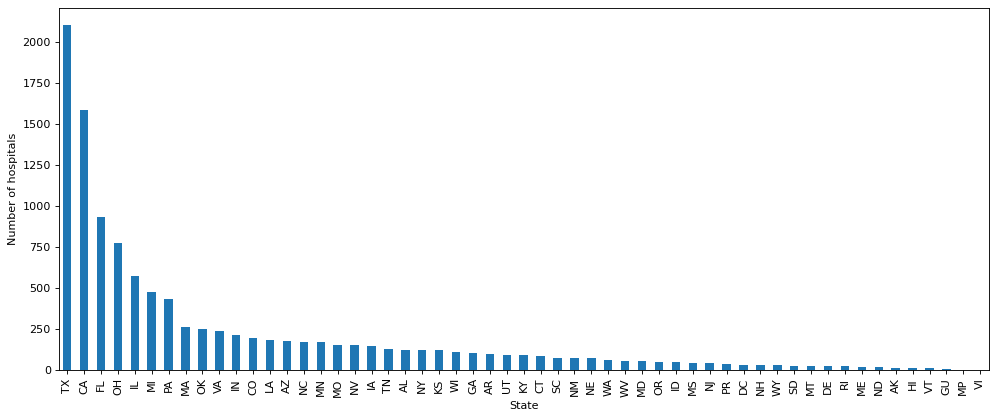

In [18]:
hosp_in_state = states_df['Provider Name'].count()
states=df['State'].value_counts()

figure(figsize=(15, 6), dpi=80)
states.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Number of hospitals")
plt.show()

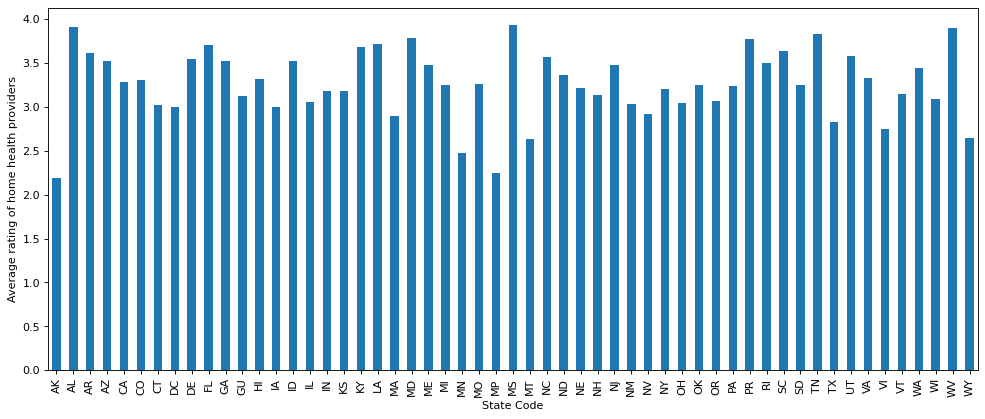

In [19]:
all_states=df.groupby("State")
n_hhc_qual=all_states['Quality of patient care star rating'].mean()

figure(figsize=(15, 6), dpi=80)
n_hhc_qual.plot(kind='bar')
#plt.annotate('Texas has the most hospitals',xy=(40,350))
plt.rcParams["font.size"] = "12"
plt.xlabel("State Code")
plt.ylabel("Average rating of home health providers")
plt.show()

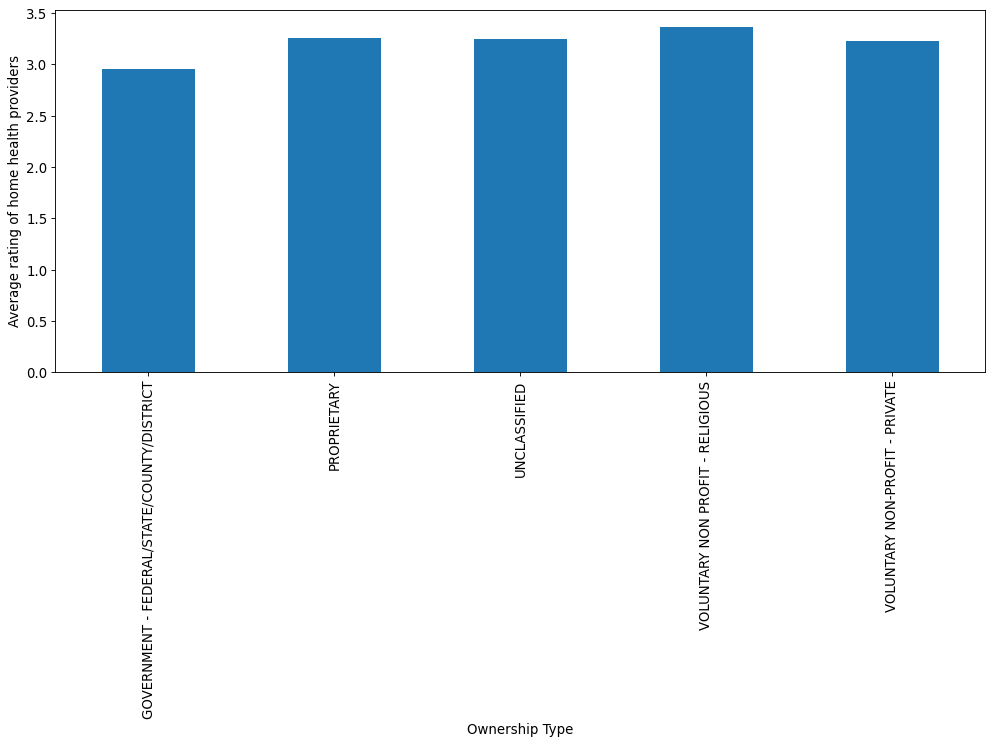

In [20]:
type_of_ownership = df.groupby("Type of Ownership")
n_hhc_qual=type_of_ownership['Quality of patient care star rating'].mean()

figure(figsize=(15, 6), dpi=80)
n_hhc_qual.plot(kind='bar')
plt.rcParams["font.size"] = "12"
plt.xlabel("Ownership Type")
plt.ylabel("Average rating of home health providers")
plt.show()

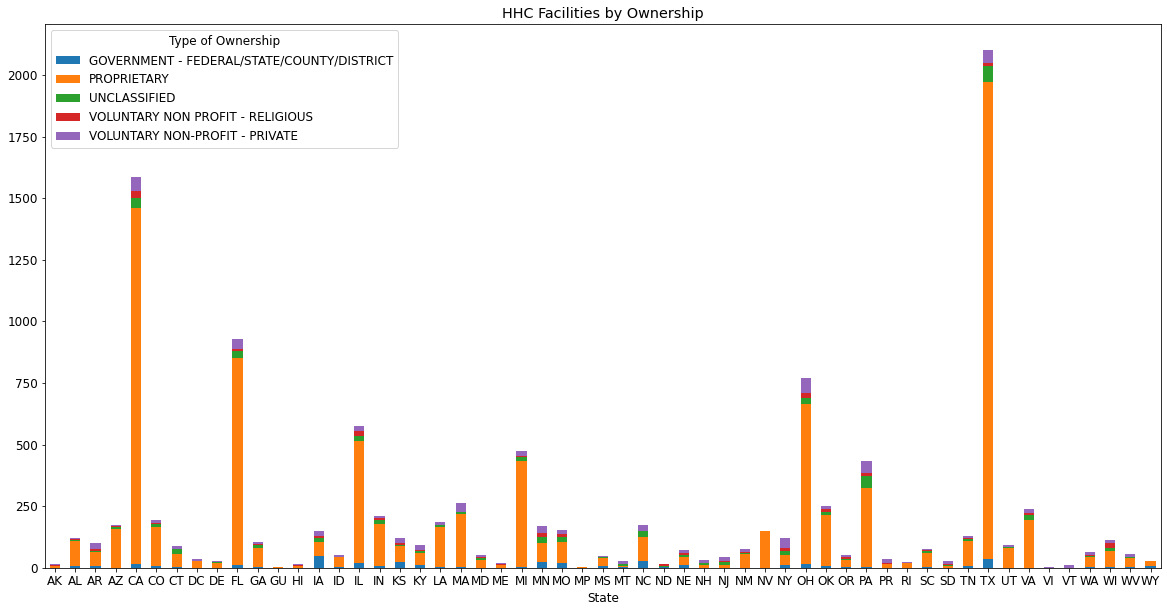

<Figure size 432x288 with 0 Axes>

In [21]:
state_by_state = df.groupby(['State', 'Type of Ownership'])['Provider Name'].count().unstack().fillna(0)
state_by_state.plot(kind='bar', stacked=True, figsize=(20,10))


plt.title('HHC Facilities by Ownership')
plt.xticks(rotation=0, ha='center')
plt.show()
plt.tight_layout()

In [22]:
df_ratings=df_ratings.replace("Higher",1)
df_ratings=df_ratings.replace("Lower",-1)
df_ratings=df_ratings.replace("Average",0)
df_ratings=df_ratings.replace("NA",None)
df_ratings.head()

,CMS Certification Number (CCN),Provider Name,Type of Ownership,Quality of patient care star rating,Timely manner rating,Teaching patients about drugs rating,Flu Shot Confirmation rating,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients' breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",How often physician-recommended actions to address medication issues were completely timely,DTC Risk-Standardized Rate,DTC Performance Categorization,PPR Risk-Standardized Rate,PPR Performance Categorization
0,17000,ALABAMA DEPARTMENT OF PUBLIC HEALTH HOME CARE,GOVERNMENT - FEDERAL/STATE/COUNTY/DISTRICT,4.0,93.4,98.8,55.3,86.3,84.6,86.6,81.4,78.9,14.4,15.8,91.6,88.24,1,3.34,0
1,17009,ENCOMPASS HEALTH HOME HEALTH,PROPRIETARY,3.5,97.1,99.6,75.4,83.2,80.2,83.4,82.1,79.4,16.0,12.1,98.1,81.10,1,2.95,1
2,17013,KINDRED AT HOME,PROPRIETARY,4.0,99.8,99.8,75.0,80.8,79.2,84.2,84.8,73.7,15.4,13.7,91.9,79.59,0,3.62,0
3,17014,AMEDISYS HOME HEALTH,PROPRIETARY,4.5,99.6,99.0,67.3,82.8,82.0,90.2,89.2,83.5,11.0,16.4,96.8,83.12,1,3.56,0
4,17016,SOUTHEAST ALABAMA HOMECARE,PROPRIETARY,4.5,99.4,100.0,85.7,85.1,87.2,88.0,92.3,84.0,15.7,16.9,96.0,84.63,1,3.34,0


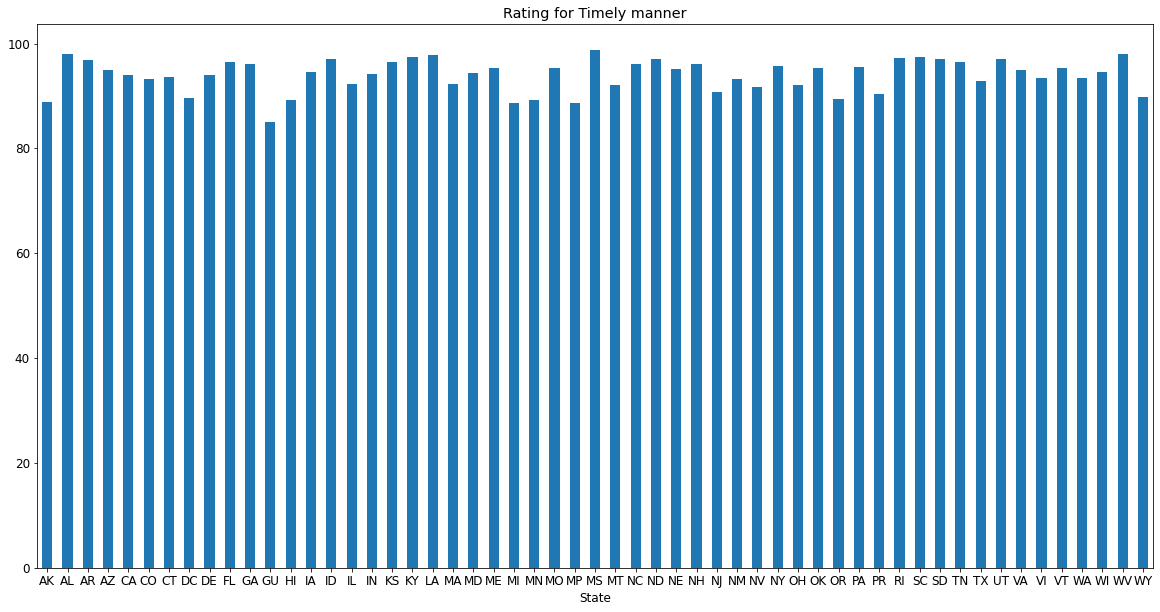

<Figure size 432x288 with 0 Axes>

In [23]:
state_by_state = df.groupby(['State'])['Timely manner rating'].mean().fillna(0)
state_by_state.plot(kind='bar', stacked=False, figsize=(20,10))


plt.title('Rating for Timely manner')
plt.xticks(rotation=0, ha='center')
plt.show()
plt.tight_layout()

In [24]:



base_url = "https://maps.googleapis.com/maps/api/geocode/json"
latitudes=[]
longitudes=[]
params = {"key": g_key}

for index, row in addresses.iterrows():
    address=row
    params['address'] = address
    try:
        my_geo = requests.get(base_url, params).json()
        lat = my_geo["results"][0]["geometry"]["location"]["lat"]
        lng = my_geo["results"][0]["geometry"]["location"]["lng"]

        latitudes.append(lat)

        longitudes.append(lng)
    except:
        print(f"Error locating address: {address} ")

print("End of Loop")

NameError: name 'addresses' is not defined